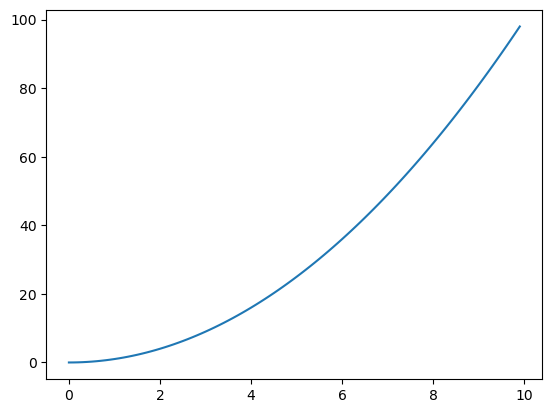

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#################################
# Adjust code to fit your needs #
#################################

t = np.arange(0,10,0.1)
x = t**2

plt.plot(t,x)

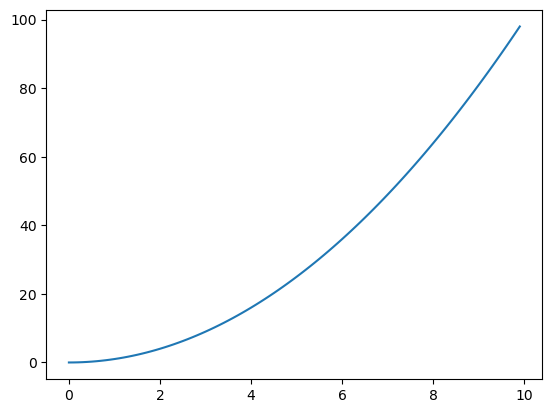

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#################################
# Adjust code to fit your needs #
#################################

t = np.arange(0,10,0.1)
x = t**2

plt.plot(t,x)

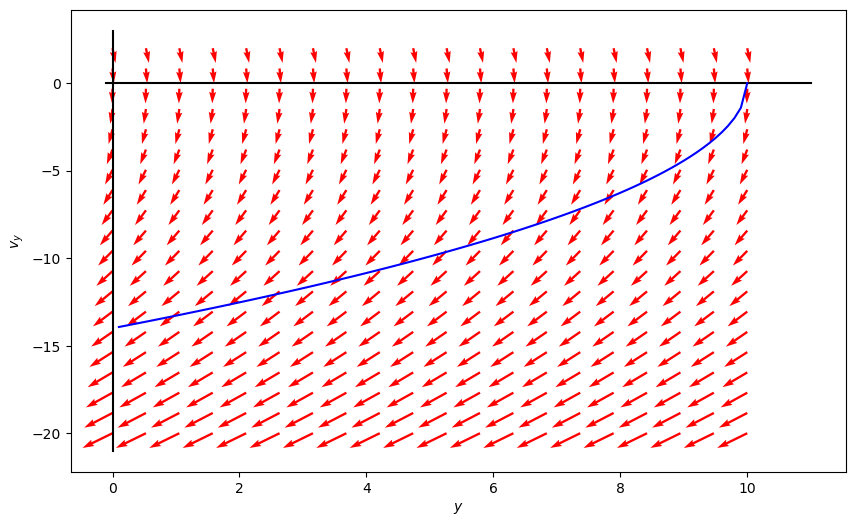

In [3]:
def GravPhasePortrait(Y,t):

## GravPhase Portrait takes the position variable y1 and velocity variable y2 
## and returns the vectors that describe how each change in the phase space
    
    y1, y2 = Y
    vectors = [y2, -9.8] ## Specific to the problem
    return vectors

y1 = np.linspace(0.0, 10.0, 20)
y2 = np.linspace(-20.0, 2.0, 20)

## A meshgrid makes pairs of points in a 2D space that 
## we can use to compute the value of a vector at a 
## location in 2D space

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

X, Y = Y1.shape

## We need to compute the vectors in the space
## This loop steps through each grid point (not two loops)
## to do this calculation

for i in range(X):
    for j in range(Y):
        x = Y1[i, j]
        y = Y2[i, j]
        vectors = GravPhasePortrait([x, y], t)
        u[i,j] = vectors[0]
        v[i,j] = vectors[1]

## A quiver plot is a common way to present a vector field
## THe arrows indicate the direction of the "flow" of the dynamical system  
ax = plt.figure(figsize=(10,6))
Q = plt.quiver(Y1, Y2, u, v, color='r')

plt.plot([-.1,11],[0,0],'-k')
plt.plot([0,0],[-21,3],'-k')
plt.xlabel('$y$')
plt.ylabel('$v_y$')

## Plotting a trajectory
y0, v0, g = 10, 0, 9.8

## To do this we solved the kinematic equations for
## the velocity in terms of the position
## In some cases, we can do this, in others,
## we will have generate data based on time 
## and plot things together (see below), but a more
## useful tool is to numerically solve the problem

y_traj = np.linspace(0.1,10,100)
v_traj = -1*np.sqrt(v0**2-2*g*(y_traj-y0)) 
#print(2*g*(y_traj-y0)**2)
plt.plot(y_traj,v_traj,'-b')

(-20.0, 5.0)

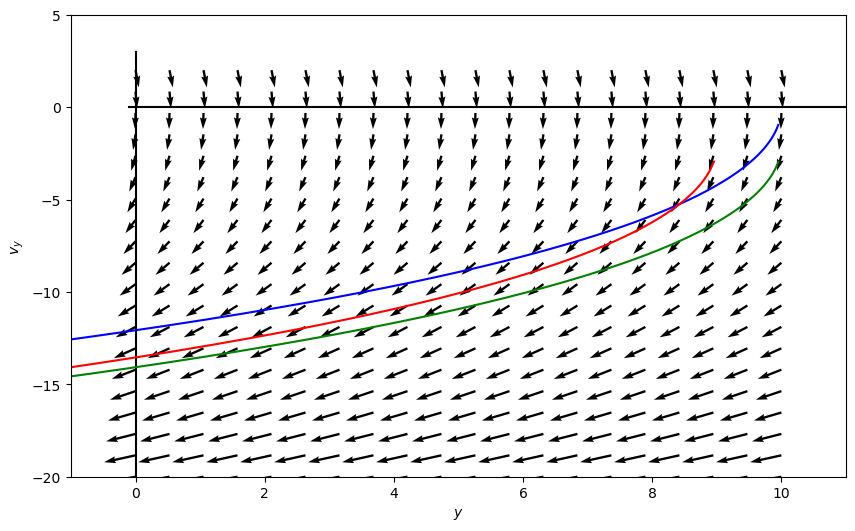

In [4]:
def GravWithLinearDragPhasePortrait(Y,t,beta = 0.1):

## GravWithLinearDragPhasePortrait takes the position variable y1 and velocity variable y2 
## and returns the vectors that describe how each change in the phase space
## the parameter beta lets you adjust the strength of the linear drag
    
    y1, y2 = Y
    vectors = [y2, -9.8-beta*y2] ## Specific to the problem
    return vectors

beta = 0.3 ## DRAG COEFF

###########################
# All the same code below #
###########################

y1 = np.linspace(0.0, 10.0, 20)
y2 = np.linspace(-20.0, 2.0, 20)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

X, Y = Y1.shape

for i in range(X):
    for j in range(Y):
        x = Y1[i, j]
        y = Y2[i, j]
        vectors = GravWithLinearDragPhasePortrait([x, y], t, beta)
        u[i,j] = vectors[0]
        v[i,j] = vectors[1]

ax = plt.figure(figsize=(10,6))
Q = plt.quiver(Y1, Y2, u, v, color='k')

plt.plot([-.1,11],[0,0],'-k')
plt.plot([0,0],[-21,3],'-k')
plt.xlabel('$y$')
plt.ylabel('$v_y$')

### Trajectory
t = np.linspace(0.1,10,1000)

y0, v0, g = 10.0, 0.0, 9.8
v_traj = v0-g/beta+(g/beta)*np.exp(-beta*t)
y_traj = y0 - (g/beta)*t + (g/beta**2)*(1-np.exp(-beta*t))

y0, v0, g = 10.0, -2.0, 9.8
v_traj2 = v0-g/beta+(g/beta)*np.exp(-beta*t)
y_traj2 = y0 - (g/beta)*t + (g/beta**2)*(1-np.exp(-beta*t))

y0, v0, g = 9.0, -2.0, 9.8
v_traj3 = v0-g/beta+(g/beta)*np.exp(-beta*t)
y_traj3 = y0 - (g/beta)*t + (g/beta**2)*(1-np.exp(-beta*t))


plt.plot(y_traj, v_traj,'-b')
plt.plot(y_traj2, v_traj2,'-g')
plt.plot(y_traj3, v_traj3,'-r')


plt.xlabel('$y$')
plt.ylabel('$v_y$')

plt.xlim([-1, 11])
plt.ylim([-20, 5])

In [5]:
## Your code here